<a href="https://colab.research.google.com/github/Alam710/facial-emotion-recognition/blob/master/CK%2BDWSC224.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Conv2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
import sys, time

# Teknik Pertama (ImageGenerator)


In [ ]:
image_size = 224
batch_size = 32
img_width, img_height = 224, 224

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dir = '/content/drive/MyDrive/Tesis/CK_7_KELAS/train/'
test_dir = '/content/drive/MyDrive/Tesis/CK_7_KELAS/valid/'
testing_dir = '/content/drive/MyDrive/Tesis/CK_7_KELAS/test'
input_shape = (image_size, image_size, 3)

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical')


Found 1001 images belonging to 7 classes.


In [ ]:
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

Found 128 images belonging to 7 classes.


In [ ]:
testing_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest'
)
testing_generator = testing_datagen.flow_from_directory(
    testing_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical')

Found 128 images belonging to 7 classes.


In [ ]:
train_generator.class_indices

{'anger': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sadness': 5,
 'surprise': 6}

In [ ]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import SeparableConv2D, MaxPooling2D

In [ ]:
"""
# Convert target vectors to categorical targets
train_generator = tensorflow.keras.utils.to_categorical(train_generator, 7)
test_generator = tensorflow.keras.utils.to_categorical(test_generator, 7)
"""

'\n# Convert target vectors to categorical targets\ntrain_generator = tensorflow.keras.utils.to_categorical(train_generator, 7)\ntest_generator = tensorflow.keras.utils.to_categorical(test_generator, 7)\n'

In [ ]:
import tensorflow.keras as keras

In [ ]:
"""
import tensorflow as tf

# Fungsi untuk membuat Separable Convolution
def separable_convolution(inputs, filters, kernel_size, strides=1, padding='same'):
    depthwise_conv = tf.keras.layers.DepthwiseConv2D(
        kernel_size=kernel_size,
        strides=strides,
        padding=padding,
        use_bias=False
    )(inputs)
    batch_norm = tf.keras.layers.BatchNormalization()(depthwise_conv)
    activation = tf.keras.layers.Activation('relu')(batch_norm)
    pointwise_conv = tf.keras.layers.Conv2D(
        filters=filters,
        kernel_size=1,
        strides=1,
        padding=padding,
        use_bias=False
    )(activation)
    return pointwise_conv

# Membuat model
input_shape = (224, 224, 3)
inputs = tf.keras.layers.Input(shape=input_shape)

x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same')(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)

x = tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)

x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)

x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
x = tf.keras.layers.Activation('relu')(x)

x = separable_convolution(x, filters=32, kernel_size=(3, 3))
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)

x = separable_convolution(x, filters=32, kernel_size=(3, 3))
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(1, 1), strides=(1, 1), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
x = tf.keras.layers.Activation('relu')(x)

x = tf.keras.layers.Conv2D(filters=32, kernel_size=(1, 1), strides=(1, 1), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)

x = tf.keras.layers.Add()([x, tf.keras.layers.BatchNormalization()(x)])
x = tf.keras.layers.Activation('relu')(x)

x = tf.keras.layers.Conv2D(filters=64, kernel_size=(1, 1), strides=(1, 1), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)

x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
x = tf.keras.layers.Activation('relu')(x)

x = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)

x = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)

x = tf.keras.layers.Conv2D(filters=7, kernel_size=(6, 6), strides=(1, 1), padding='valid')(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)

outputs = tf.keras.layers.Activation('softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Menampilkan ringkasan model
model.summary()
"""

"\nimport tensorflow as tf\n\n# Fungsi untuk membuat Separable Convolution\ndef separable_convolution(inputs, filters, kernel_size, strides=1, padding='same'):\n    depthwise_conv = tf.keras.layers.DepthwiseConv2D(\n        kernel_size=kernel_size,\n        strides=strides,\n        padding=padding,\n        use_bias=False\n    )(inputs)\n    batch_norm = tf.keras.layers.BatchNormalization()(depthwise_conv)\n    activation = tf.keras.layers.Activation('relu')(batch_norm)\n    pointwise_conv = tf.keras.layers.Conv2D(\n        filters=filters,\n        kernel_size=1,\n        strides=1,\n        padding=padding,\n        use_bias=False\n    )(activation)\n    return pointwise_conv\n\n# Membuat model\ninput_shape = (224, 224, 3)\ninputs = tf.keras.layers.Input(shape=input_shape)\n\nx = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same')(inputs)\nx = tf.keras.layers.BatchNormalization()(x)\nx = tf.keras.layers.Activation('relu')(x)\n\nx = tf.keras.layers.

In [ ]:

import tensorflow as tf

# Membangun model menggunakan TensorFlow
inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.layers.Conv2D(8, (3, 3), padding='same')(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(16, (3, 3), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(16, (3, 3), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.SeparableConv2D(32, (3, 3), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.SeparableConv2D(32, (3, 3), padding='same')(x)
x = tf.keras.layers.Conv2D(16, (1, 1), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (3, 3), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Add()([x, tf.keras.layers.BatchNormalization()(x)])
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(64, (3, 3), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(64, (3, 3), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.MaxPooling2D((2, 2))(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(512)(x)
x = tf.keras.layers.Dense(512)(x)
output = tf.keras.layers.Dense(7, activation='softmax')(x)

# Membuat model
model = tf.keras.Model(inputs=inputs, outputs=output)

# Menampilkan ringkasan model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 8)  224         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 224, 224, 8)  32         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [ ]:
# Compile the model
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
# checkpoints
from tensorflow.keras.callbacks import ModelCheckpoint
weightpath = "model"
checkpoints = ModelCheckpoint(weightpath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
callback_list = [checkpoints]

In [ ]:
from tensorflow.keras.callbacks import TensorBoard
# TensorBoard Callbacks
callbacks = TensorBoard(log_dir='./Graph')

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    # print(logs)
    if(logs.get('val_accuracy') > 0.99):
      print("\nAkurasi telah mencapai > 99%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
def print_time_taken(start_time, end_time):
    secs_elapsed = end_time - start_time

    SECS_PER_MIN = 60
    SECS_PER_HR  = 60 * SECS_PER_MIN

    hrs_elapsed, secs_elapsed = divmod(secs_elapsed, SECS_PER_HR)
    mins_elapsed, secs_elapsed = divmod(secs_elapsed, SECS_PER_MIN)

    if hrs_elapsed > 0:
        print('Time taken: %d hrs %d mins %d secs' % (hrs_elapsed, mins_elapsed, secs_elapsed))
    elif mins_elapsed > 0:
        print('Time taken: %d mins %d secs' % (mins_elapsed, secs_elapsed))
    elif secs_elapsed > 1:
        print('Time taken: %d secs' % (secs_elapsed))
    else:
        print('Time taken - less than 1 sec')

In [ ]:
import sys, time
start_time = time.time()


history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    validation_data=test_generator,
                    # validation_steps=72 *0.15,
                    epochs=50,
                    verbose=2,
                    callbacks=[callbacks])


end_time = time.time()
print_time_taken(start_time, end_time)

Epoch 1/50
32/32 - 309s - loss: 49.0400 - accuracy: 0.3317 - val_loss: 125.0941 - val_accuracy: 0.2578 - 309s/epoch - 10s/step
Epoch 2/50
32/32 - 16s - loss: 6.5826 - accuracy: 0.3956 - val_loss: 6.1398 - val_accuracy: 0.1641 - 16s/epoch - 511ms/step
Epoch 3/50
32/32 - 17s - loss: 4.9965 - accuracy: 0.3956 - val_loss: 30.0590 - val_accuracy: 0.2578 - 17s/epoch - 546ms/step
Epoch 4/50
32/32 - 16s - loss: 1.9461 - accuracy: 0.4166 - val_loss: 4.8600 - val_accuracy: 0.2031 - 16s/epoch - 513ms/step
Epoch 5/50
32/32 - 16s - loss: 1.5633 - accuracy: 0.4116 - val_loss: 5.2899 - val_accuracy: 0.2031 - 16s/epoch - 514ms/step
Epoch 6/50
32/32 - 17s - loss: 1.9429 - accuracy: 0.4496 - val_loss: 5.1964 - val_accuracy: 0.1641 - 17s/epoch - 519ms/step
Epoch 7/50
32/32 - 17s - loss: 1.3193 - accuracy: 0.4456 - val_loss: 4.5000 - val_accuracy: 0.2031 - 17s/epoch - 532ms/step
Epoch 8/50
32/32 - 16s - loss: 1.3143 - accuracy: 0.4585 - val_loss: 3.9546 - val_accuracy: 0.1797 - 16s/epoch - 510ms/step
Epoc

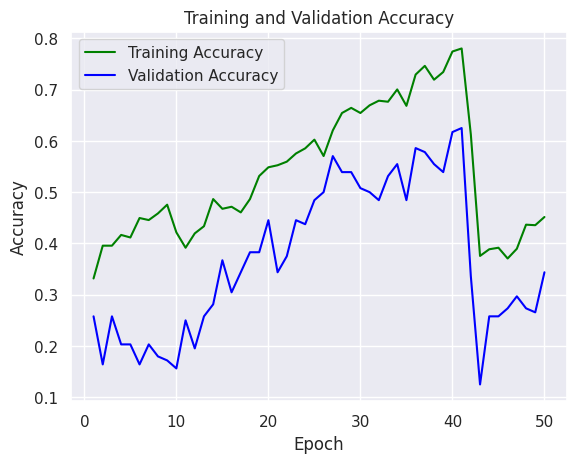

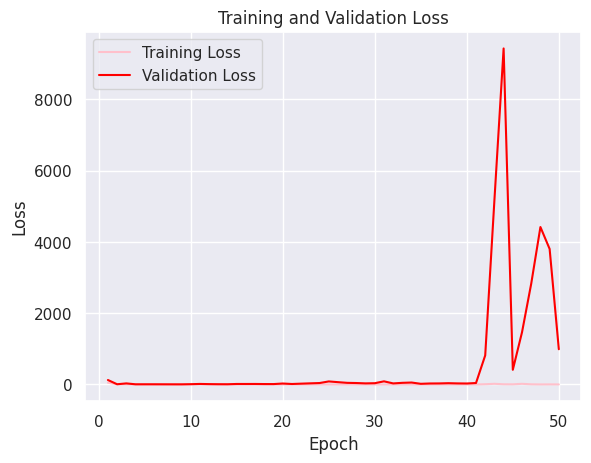

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
test_score = model.evaluate_generator(testing_generator, batch_size)

print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100))
print("[INFO] Loss: ",test_score[0])

<ipython-input-21-f57e3433d594>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_score = model.evaluate_generator(testing_generator, batch_size)


[INFO] accuracy: 37.50%
[INFO] Loss:  752.130126953125


In [ ]:
model.save("/content/drive/MyDrive/Depthwise Separable Convolution/MODEL_SAVE/CK+DWSC.h5")

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Depthwise Separable Convolution/MODEL_SAVE/CK+DWSC.h5")

In [ ]:
#Plot the confusion matrix. Set Normalize = True/False

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools
#shuffle=False

target_names = []
for key in train_generator.class_indices:
    target_names.append(key)

# print(target_names)

#Confution Matrix

Y_pred = model.predict_generator(testing_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(testing_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix 224 x 224')

#Print Classification Report
print('Classification Report')
print(classification_report(testing_generator.classes, y_pred, target_names=target_names))

# Teknik KeDua (Split Pas Training)



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Data Preparation for Classification (Original Image)
import os
from pathlib import Path

data_path = Path('/content/gdrive/MyDrive/Depthwise_Separable_Convolution/CKPLUS')
label_names = sorted([subfolder.name for subfolder in data_path.glob('*')])
num_classes = len(label_names)

class_counts = [0] * num_classes  # Initialize class counts

# Iterate over each label folder
for i, label_name in enumerate(label_names):
    label_path = data_path / label_name

    # Recursive function to count images in subfolders
    def count_images(folder):
        num_images = 0
        for item in folder.iterdir():
            if item.is_file() and item.suffix.lower() == '.jpg':
                num_images += 1
            elif item.is_dir():
                num_images += count_images(item)
        return num_images

    # Count the number of images within the label folder
    class_counts[i] = count_images(label_path)

# Print the number of images and classes
print('Number of classes:', num_classes)

# Print the number of images for each class
for i, label_name in enumerate(label_names):
    print(f'Class: {label_name}, Number of images: {class_counts[i]}')

Number of classes: 7
Class: angry, Number of images: 136
Class: disgust, Number of images: 177
Class: fear, Number of images: 75
Class: happy, Number of images: 207
Class: neutral, Number of images: 327
Class: sadness, Number of images: 84
Class: surprise, Number of images: 251


In [ ]:
import os
import cv2
import numpy as np
from pathlib import Path
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input as efficientnet_preprocess_input

data_path = Path('/content/gdrive/MyDrive/Depthwise_Separable_Convolution/CKPLUS')
label_names = sorted([subfolder.name for subfolder in data_path.glob('*')])
num_classes = len(label_names)
target_image_size = (224, 224)

# Create empty lists for images and labels
images = []
labels = []

# Recursive function to load images from subfolders
def load_images_from_folder(folder):
    for item in folder.iterdir():
        if item.is_dir():
            load_images_from_folder(item)
        elif item.is_file() and item.suffix.lower() == '.jpg':
            # Load the image in color
            image = cv2.imread(str(item))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Resize the image to the target size (224x224)
            image = cv2.resize(image, target_image_size)

            # Preprocess the image
            image = efficientnet_preprocess_input(image)

            # Append the image and label to the lists
            images.append(image)
            labels.append(label_names.index(folder.name))

# Iterate over each label folder
for label_name in label_names:
    label_path = data_path / label_name
    load_images_from_folder(label_path)

# Convert the lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.20, random_state=42)

# Load the EfficientNetB0 model
# base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(target_image_size[0], target_image_size[1], 3))

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dense, BatchNormalization, Activation, MaxPooling2D, Add, SeparableConv2D

def conv_block(inputs, filters, kernel_size, strides, padding='same'):
    x = Conv2D(filters=filters, kernel_size=kernel_size, strides=strides, padding=padding)(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

def residual_module(inputs, filters, num_blocks, strides):
    x = conv_block(inputs, filters, kernel_size=(1, 1), strides=strides)

    for _ in range(num_blocks):
        y = conv_block(x, filters, kernel_size=(3, 3), strides=(1, 1))
        y = conv_block(y, filters, kernel_size=(3, 3), strides=(1, 1))
        x = Add()([x, y])

    return x

def inverted_residual_structure(inputs, filters, num_blocks):
    x = conv_block(inputs, filters, kernel_size=(1, 1), strides=(1, 1))

    for _ in range(num_blocks):
        y = conv_block(x, filters, kernel_size=(3, 3), strides=(1, 1))
        y = conv_block(y, filters, kernel_size=(3, 3), strides=(1, 1))
        x = Add()([x, y])

    return x

input_shape = (target_image_size[0], target_image_size[1], 3)
num_classes = 7

inputs = tf.keras.Input(shape=input_shape)
x = conv_block(inputs, filters=32, kernel_size=(5, 5), strides=(1, 1))
x = MaxPooling2D(2, 2)(x)
x = conv_block(x, filters=64, kernel_size=(5, 5), strides=(1, 1))
x = MaxPooling2D(2, 2)(x)
x = residual_module(x, filters=128, num_blocks=2, strides=(2, 2))
x = inverted_residual_structure(x, filters=256, num_blocks=4)
x = residual_module(x, filters=256, num_blocks=2, strides=(2, 2))
x = residual_module(x, filters=364, num_blocks=1, strides=(1, 1))
x = residual_module(x, filters=364, num_blocks=2, strides=(2, 2))
x = inverted_residual_structure(x, filters=512, num_blocks=1)
x = SeparableConv2D(filters=728, kernel_size=(1, 1), strides=(1, 1), padding='same')(x)
x = GlobalAveragePooling2D()(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 32  2432        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 224, 224, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
import tensorflow as tf
# from tensorflow.keras.callbacks import EarlyStopping

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Define early stopping callback
# early_stopping = EarlyStopping(monitor='val_accuracy', patience=0.01, mode='max', verbose=1)

# Train the model with early stopping
history_model = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
32/32 [==============================] - 52s 354ms/step - loss: 1.4284 - accuracy: 0.4279 - val_loss: 25131738.0000 - val_accuracy: 0.2103
Epoch 2/100
32/32 [==============================] - 8s 240ms/step - loss: 1.3094 - accuracy: 0.4408 - val_loss: 20104.0078 - val_accuracy: 0.2103
Epoch 3/100
32/32 [==============================] - 8s 239ms/step - loss: 1.2941 - accuracy: 0.4418 - val_loss: 103.7856 - val_accuracy: 0.2103
Epoch 4/100
32/32 [==============================] - 8s 240ms/step - loss: 1.2648 - accuracy: 0.4647 - val_loss: 63.2273 - val_accuracy: 0.2103
Epoch 5/100
32/32 [==============================] - 8s 242ms/step - loss: 1.2621 - accuracy: 0.4756 - val_loss: 374.5074 - val_accuracy: 0.2103
Epoch 6/100
32/32 [==============================] - 8s 246ms/step - loss: 1.2175 - accuracy: 0.4687 - val_loss: 3.0316 - val_accuracy: 0.3929
Epoch 7/100
32/32 [==============================] - 8s 247ms/step - loss: 1.1252 - accuracy: 0.5423 - val_loss: 9.8145 - val

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

8/8 [==============================] - 1s 73ms/step - loss: 0.1828 - accuracy: 0.9960
Test loss: 0.182757169008255
Test accuracy: 0.9960317611694336


In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

8/8 [==============================] - 1s 74ms/step - loss: 0.1828 - accuracy: 0.9960
Test loss: 0.182757169008255
Test accuracy: 0.9960317611694336


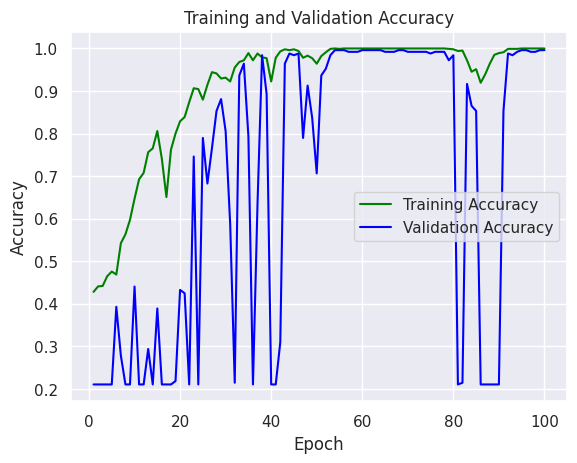

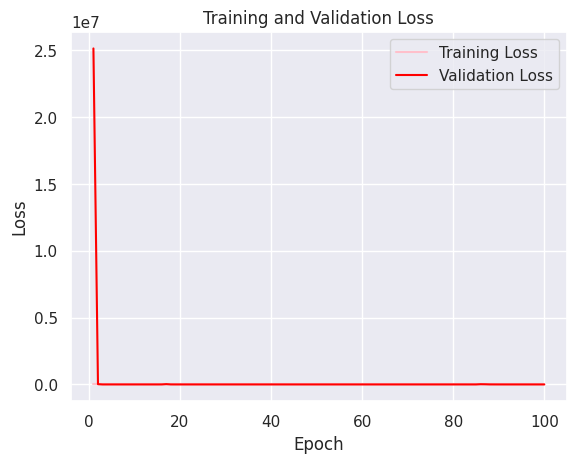

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = history_model.history['accuracy']
val_acc = history_model.history['val_accuracy']
loss = history_model.history['loss']
val_loss = history_model.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
#from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
preds_probs = model.predict(X_test, verbose=1)

8/8 [==============================] - 1s 68ms/step


In [ ]:
preds_probs[:10]

array([[3.39498457e-10, 1.24212178e-07, 1.80212173e-05, 9.99981880e-01,
        9.91159421e-09, 9.11465933e-18, 1.32369989e-15],
       [9.99990940e-01, 2.89334844e-06, 4.68464577e-07, 1.15432401e-08,
        8.59233032e-11, 5.75858985e-06, 1.95406816e-10],
       [9.99991059e-01, 7.87261433e-06, 4.07241686e-07, 1.05877106e-07,
        5.57825834e-11, 5.50819891e-07, 1.95485399e-11],
       [9.99480903e-01, 3.94111295e-04, 5.50532332e-06, 1.19338802e-04,
        2.21498353e-09, 1.05985087e-07, 2.73112262e-11],
       [1.09033676e-11, 1.12353172e-20, 6.65457555e-05, 4.88178473e-17,
        3.78906281e-11, 5.61528509e-07, 9.99932885e-01],
       [2.97277370e-06, 1.61598909e-05, 1.58565825e-07, 9.99980807e-01,
        1.63300415e-11, 1.42417225e-17, 1.45574410e-18],
       [3.05701436e-11, 4.90373047e-25, 2.06165282e-06, 7.26560735e-22,
        8.45878071e-16, 6.00707949e-07, 9.99997377e-01],
       [1.02176700e-09, 9.58099022e-08, 3.42867861e-06, 9.99996424e-01,
        3.03744363e-10, 6

In [ ]:
# We get one prediction probability per class (in our case there's 101 prediction probabilities)
print(f"Number of prediction probabilities for sample 0: {len(preds_probs[0])}")
print(f"What prediction probability sample 0 looks like:\n {preds_probs[0]}")
print(f"The class with the highest predicted probability by the model for sample 0: {preds_probs[0].argmax()}")

Number of prediction probabilities for sample 0: 7
What prediction probability sample 0 looks like:
 [3.3949846e-10 1.2421218e-07 1.8021217e-05 9.9998188e-01 9.9115942e-09
 9.1146593e-18 1.3236999e-15]
The class with the highest predicted probability by the model for sample 0: 3


In [ ]:
len(preds_probs)

252

In [ ]:
preds_probs.shape

(252, 7)

In [ ]:
# What does the first prediction probability array look like?
preds_probs[0], len(preds_probs[0]), sum(preds_probs[0])

(array([3.3949846e-10, 1.2421218e-07, 1.8021217e-05, 9.9998188e-01,
        9.9115942e-09, 9.1146593e-18, 1.3236999e-15], dtype=float32),
 7,
 1.0000000358685897)

In [ ]:
# Get the pred classes of each label
pred_classes = preds_probs.argmax(axis=1)

In [ ]:
# How to they look?
pred_classes[:7]

array([3, 0, 0, 0, 6, 3, 6])

In [ ]:
# How many pred classes do we have?
len(pred_classes)

252

In [ ]:
#import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report
from sklearn import metrics

In [ ]:
y_test.shape, preds_probs.shape

((252,), (252, 7))

In [ ]:
y_test.shape

(252,)

In [ ]:
preds_probs.shape

(252, 7)

In [ ]:
preds_probs = np.argmax(preds_probs, axis=1)
preds_probs.shape

(252,)

In [ ]:
print(metrics.accuracy_score(y_test, preds_probs))

0.996031746031746


In [ ]:
print(classification_report(y_test, preds_probs))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        44
           4       0.98      1.00      0.99        53
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        48

    accuracy                           1.00       252
   macro avg       1.00      0.99      1.00       252
weighted avg       1.00      1.00      1.00       252



In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('int') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=(7, 7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    plt.grid(False)  # Remove the grid lines
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)



Confusion matrix, without normalization


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

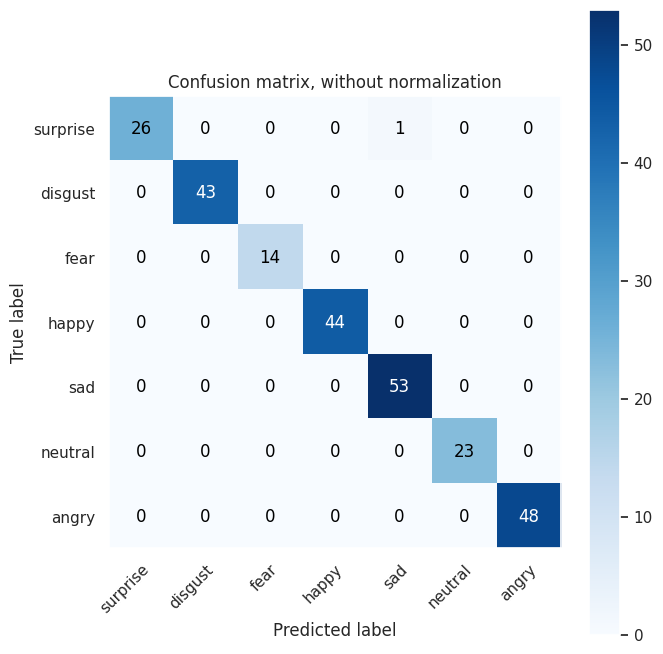

In [ ]:
#Plotting the confusion matrix
confusion_mtx = confusion_matrix(y_test, preds_probs)
class_names=['surprise', 'disgust', 'fear', 'happy', 'sad', 'neutral', 'angry']
# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_test, preds_probs, classes = class_names, title='Confusion matrix, without normalization')

Normalized confusion matrix


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

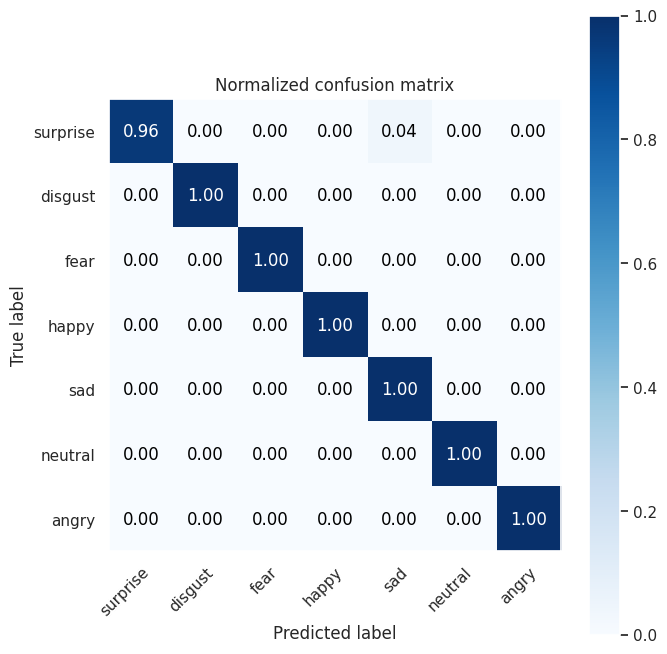

In [ ]:
#Plotting normalized confusion matrix
plot_confusion_matrix(y_test, preds_probs, classes = class_names, normalize = True, title = 'Normalized confusion matrix')

# Teknik Ketiga

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Import libraries# Impor
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import keras
from keras.utils import np_utils
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, Adam
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Define Datapath
data_path = '/content/drive/MyDrive/Depthwise Separable Convolution/CK_7_KELAS_new'
data_dir_list = os.listdir(data_path)

img_rows=256
img_cols=256
num_channel=1

num_epoch=10

img_data_list=[]


for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(224,224))
        img_data_list.append(input_img_resize)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data = img_data/255
img_data.shape

Loaded the images of dataset-anger

Loaded the images of dataset-fear

Loaded the images of dataset-happy

Loaded the images of dataset-disgust

Loaded the images of dataset-neutral

Loaded the images of dataset-sadness

Loaded the images of dataset-surprise



(1257, 224, 224, 3)

In [ ]:
num_classes = 7

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:135]=0 # anger
labels[136:210]=1 # fear
labels[211:417]=2 # happy
labels[418:594]=3 # disgust
labels[595:921]=4 # neutral
labels[922:1005]=5 # sadness
labels[1006:]=6 # surprise

names = ['anger','fear','happy','disgust','neutral','sadness','surprise']

def getLabel(id):
    return ['anger','fear','happy','disgust','neutral','sadness','surprise'][id]

In [ ]:
# convert class labels to on-hot encoding# conve
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=2)

In [ ]:
# Defining the model
input_shape=img_data[0].shape

model = Sequential()

In [ ]:
import tensorflow as tf
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, SeparableConv2D

In [ ]:
import tensorflow as tf

def depthwise_separable_convolution(inputs, filters, kernel_size, strides):
    # Depthwise Convolution
    depthwise = tf.keras.layers.DepthwiseConv2D(kernel_size=kernel_size, strides=strides, padding='same')(inputs)
    depthwise = tf.keras.layers.BatchNormalization()(depthwise)
    depthwise = tf.keras.layers.ReLU()(depthwise)

    # Pointwise Convolution
    pointwise = tf.keras.layers.Conv2D(filters=filters, kernel_size=1, strides=1, padding='same')(depthwise)
    pointwise = tf.keras.layers.BatchNormalization()(pointwise)
    pointwise = tf.keras.layers.ReLU()(pointwise)

    return pointwise

def facial_expression_model():
    inputs = tf.keras.Input(shape=(224, 224, 3))

    # Convolutional Layers
    x = depthwise_separable_convolution(inputs, filters=64, kernel_size=3, strides=1)
    x = tf.keras.layers.MaxPooling2D(pool_size=2, strides=2)(x)
    x = depthwise_separable_convolution(x, filters=128, kernel_size=3, strides=1)
    x = tf.keras.layers.MaxPooling2D(pool_size=2, strides=2)(x)
    x = depthwise_separable_convolution(x, filters=256, kernel_size=3, strides=1)
    x = tf.keras.layers.MaxPooling2D(pool_size=2, strides=2)(x)
    x = depthwise_separable_convolution(x, filters=512, kernel_size=3, strides=1)
    x = tf.keras.layers.MaxPooling2D(pool_size=2, strides=2)(x)

    # Global Average Pooling
    x = tf.keras.layers.GlobalAveragePooling2D()(x)

    # Fully Connected Layers
    x = tf.keras.layers.Dense(units=256, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(units=128, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(units=7, activation='softmax')(x)  # 7 classes for facial expressions

    model = tf.keras.Model(inputs=inputs, outputs=x)

    return model

# Create the model
model = facial_expression_model()

# Print model summary
model.summary()


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# checkpoints
from tensorflow.keras.callbacks import ModelCheckpoint
weightpath = "model"
checkpoints = ModelCheckpoint(weightpath, monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True, mode='max')
callback_list = [checkpoints]

In [ ]:
from tensorflow.keras.callbacks import TensorBoard
# TensorBoard Callbacks
callbacks = TensorBoard(log_dir='./Graph')

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.98):
      print("\nAkurasi telah mencapai > 98%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
def print_time_taken(start_time, end_time):
    secs_elapsed = end_time - start_time

    SECS_PER_MIN = 60
    SECS_PER_HR  = 60 * SECS_PER_MIN

    hrs_elapsed, secs_elapsed = divmod(secs_elapsed, SECS_PER_HR)
    mins_elapsed, secs_elapsed = divmod(secs_elapsed, SECS_PER_MIN)

    if hrs_elapsed > 0:
        print('Time taken: %d hrs %d mins %d secs' % (hrs_elapsed, mins_elapsed, secs_elapsed))
    elif mins_elapsed > 0:
        print('Time taken: %d mins %d secs' % (mins_elapsed, secs_elapsed))
    elif secs_elapsed > 1:
        print('Time taken: %d secs' % (secs_elapsed))
    else:
        print('Time taken - less than 1 sec')


In [ ]:
# train
import sys, time
start_time = time.time()

hist = model.fit(X_train,
                 y_train,
                 batch_size=32,
                 epochs=10,
                 verbose=1,
                 validation_data=(X_test, y_test),
                 callbacks=[callbacks])


end_time = time.time()
print_time_taken(start_time, end_time)

Epoch 1/10
34/34 [==============================] - 18s 209ms/step - loss: 1.5916 - accuracy: 0.3914 - val_loss: 1.9614 - val_accuracy: 0.1693
Epoch 2/10
34/34 [==============================] - 5s 152ms/step - loss: 1.3710 - accuracy: 0.4588 - val_loss: 1.9840 - val_accuracy: 0.1693
Epoch 3/10
34/34 [==============================] - 5s 155ms/step - loss: 1.3224 - accuracy: 0.4476 - val_loss: 2.0224 - val_accuracy: 0.1693
Epoch 4/10
34/34 [==============================] - 5s 153ms/step - loss: 1.2878 - accuracy: 0.4934 - val_loss: 2.0482 - val_accuracy: 0.1693
Epoch 5/10
34/34 [==============================] - 5s 158ms/step - loss: 1.2789 - accuracy: 0.5075 - val_loss: 2.0569 - val_accuracy: 0.1799
Epoch 6/10
34/34 [==============================] - 6s 165ms/step - loss: 1.2065 - accuracy: 0.5159 - val_loss: 2.1001 - val_accuracy: 0.1164
Epoch 7/10
34/34 [==============================] - 5s 153ms/step - loss: 1.1128 - accuracy: 0.5627 - val_loss: 2.2038 - val_accuracy: 0.1799
Epoch

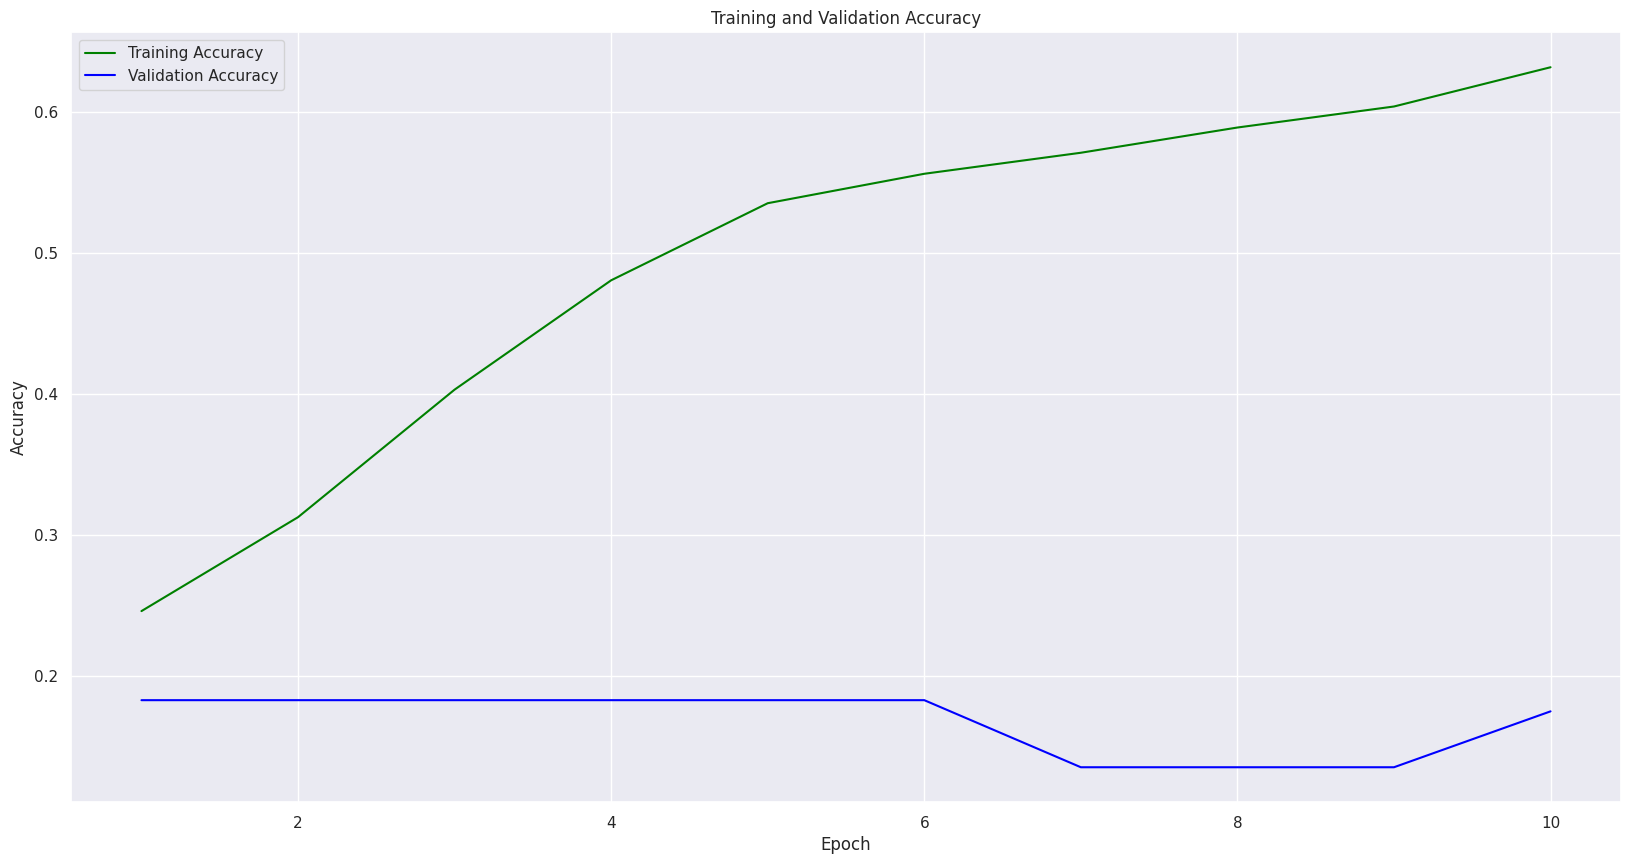

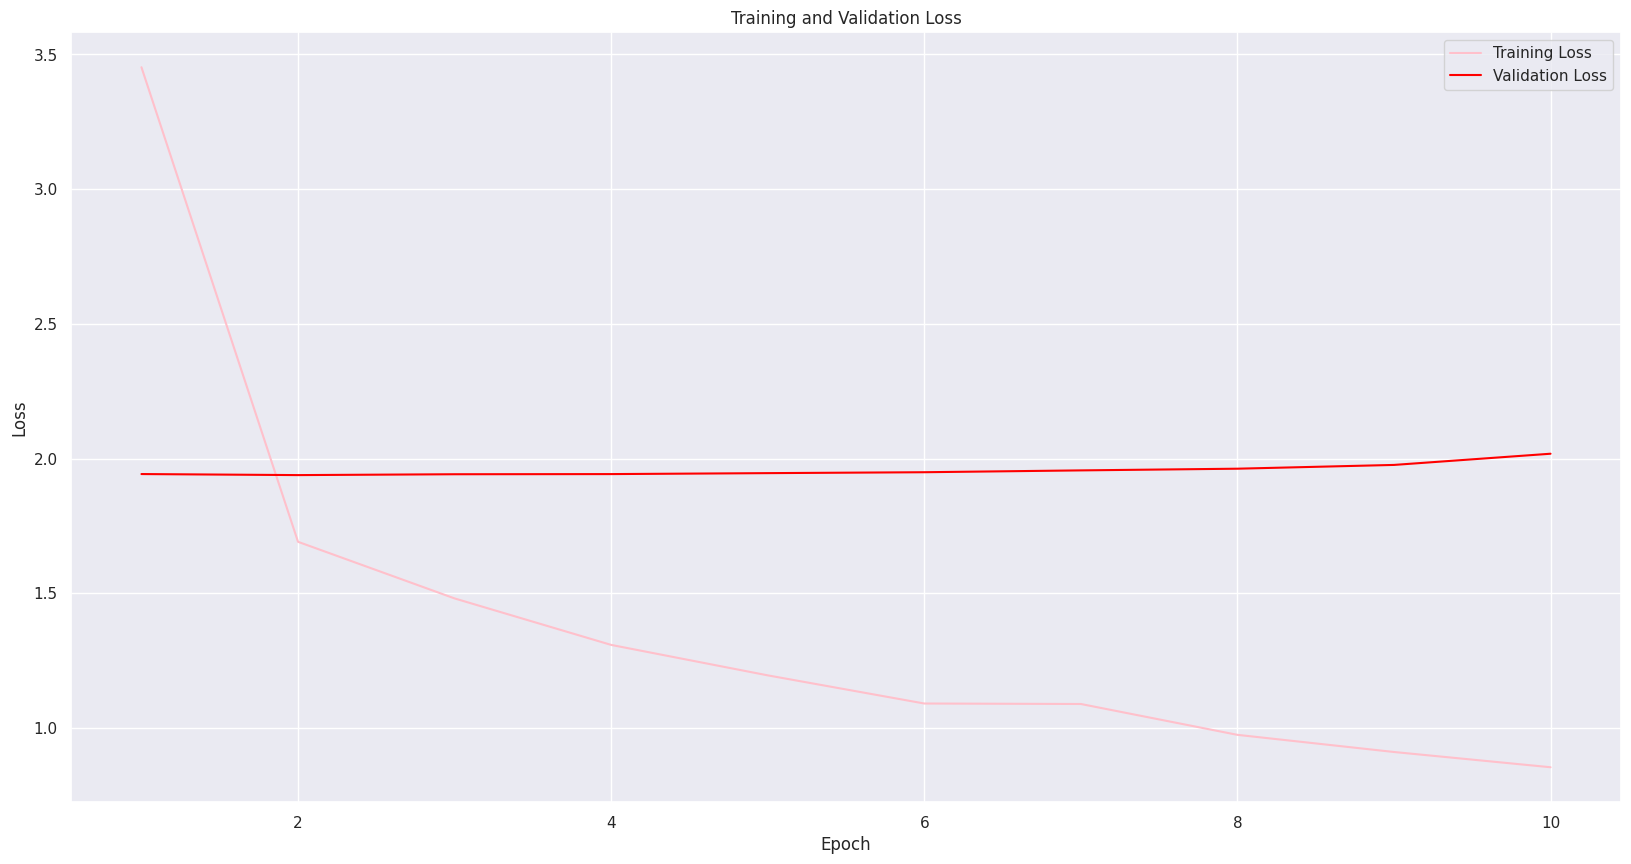

In [ ]:
# visualizing losses and accuracy
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Evaluating the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 1.415846347808838
Test accuracy: 0.4365079402923584


In [ ]:
test_image = X_test[0:1]
print (test_image.shape)

(1, 224, 224, 3)


In [ ]:
print(model.predict(test_image))

1/1 [==============================] - 1s 712ms/step
[[0.1242206  0.09011298 0.18283051 0.14862908 0.14910427 0.09544805
  0.2096544 ]]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
#from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
preds_probs = model.predict(X_test, verbose=1)

8/8 [==============================] - 0s 17ms/step


In [ ]:
preds_probs[:10]

array([[1.2422060e-01, 9.0112984e-02, 1.8283051e-01, 1.4862908e-01,
        1.4910427e-01, 9.5448054e-02, 2.0965441e-01],
       [1.2422060e-01, 9.0112984e-02, 1.8283051e-01, 1.4862908e-01,
        1.4910427e-01, 9.5448054e-02, 2.0965441e-01],
       [1.2422060e-01, 9.0112984e-02, 1.8283051e-01, 1.4862908e-01,
        1.4910427e-01, 9.5448054e-02, 2.0965441e-01],
       [4.6767894e-20, 1.8197822e-04, 4.5162220e-03, 3.1704541e-13,
        9.9524707e-01, 5.6471015e-11, 5.4744822e-05],
       [1.2422060e-01, 9.0112984e-02, 1.8283051e-01, 1.4862908e-01,
        1.4910427e-01, 9.5448054e-02, 2.0965441e-01],
       [0.0000000e+00, 1.5331610e-09, 1.4095044e-06, 3.0088005e-31,
        9.9999857e-01, 1.7914820e-25, 2.4120905e-11],
       [0.0000000e+00, 7.7428210e-11, 1.7909129e-07, 7.4873767e-36,
        9.9999976e-01, 3.5425104e-29, 5.7328057e-13],
       [1.2422060e-01, 9.0112984e-02, 1.8283051e-01, 1.4862908e-01,
        1.4910427e-01, 9.5448054e-02, 2.0965441e-01],
       [1.2422060e-01, 9

In [ ]:
# We get one prediction probability per class (in our case there's 101 prediction probabilities)
print(f"Number of prediction probabilities for sample 0: {len(preds_probs[0])}")
print(f"What prediction probability sample 0 looks like:\n {preds_probs[0]}")
print(f"The class with the highest predicted probability by the model for sample 0: {preds_probs[0].argmax()}")

Number of prediction probabilities for sample 0: 7
What prediction probability sample 0 looks like:
 [0.1242206  0.09011298 0.18283051 0.14862908 0.14910427 0.09544805
 0.2096544 ]
The class with the highest predicted probability by the model for sample 0: 6


In [ ]:
len(preds_probs)

252

In [ ]:
preds_probs.shape

(252, 7)

In [ ]:
# What does the first prediction probability array look like?
preds_probs[0], len(preds_probs[0]), sum(preds_probs[0])

(array([0.1242206 , 0.09011298, 0.18283051, 0.14862908, 0.14910427,
        0.09544805, 0.2096544 ], dtype=float32),
 7,
 0.9999999105930328)

In [ ]:
# Get the pred classes of each label
pred_classes = preds_probs.argmax(axis=1)

In [ ]:
# How many pred classes do we have?
len(pred_classes)

252

In [ ]:
#import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report
from sklearn import metrics

In [ ]:
y_test.shape, preds_probs.shape

((252, 7), (252, 7))

In [ ]:
y_test = np.argmax(y_test, axis=1)

In [ ]:
preds_probs.shape , y_test.shape

((252, 7), (252,))

In [ ]:
y_test.shape

(252,)

In [ ]:
preds_probs.shape

(252, 7)

In [ ]:
preds_probs = np.argmax(preds_probs, axis=1)
preds_probs.shape

(252,)

In [ ]:
print(metrics.accuracy_score(y_test, preds_probs))

0.4365079365079365


In [ ]:
print(classification_report(y_test, preds_probs))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.00      0.00      0.00        18
           2       0.00      0.00      0.00        34
           3       0.00      0.00      0.00        44
           4       1.00      1.00      1.00        64
           5       0.00      0.00      0.00        15
           6       0.24      1.00      0.39        46

    accuracy                           0.44       252
   macro avg       0.18      0.29      0.20       252
weighted avg       0.30      0.44      0.33       252



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
#Defining function for confusion matrix plot
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    #Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('int') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')


    #Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

Confusion matrix, without normalization


<Axes: title={'center': 'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

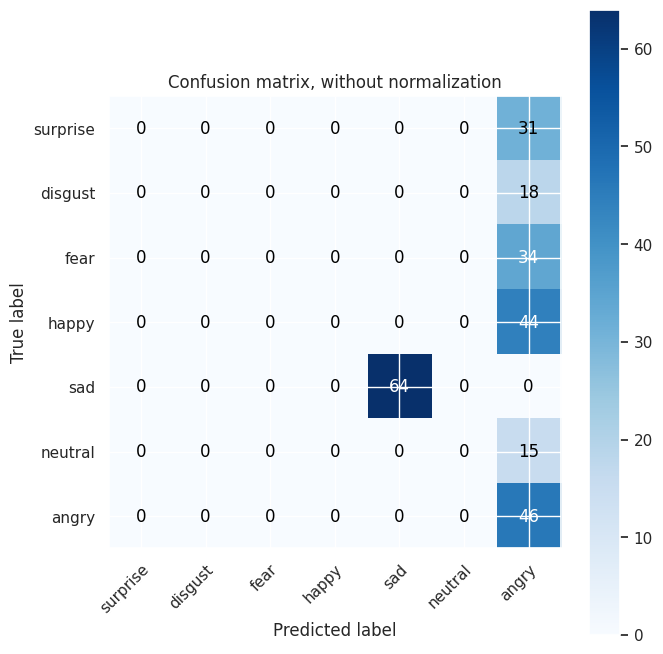

In [ ]:
#Plotting the confusion matrix
confusion_mtx = confusion_matrix(y_test, preds_probs)
class_names=['surprise', 'disgust', 'fear', 'happy', 'sad', 'neutral', 'angry']
# Plotting non-normalized confusion matrix
plot_confusion_matrix(y_test, preds_probs, classes = class_names, title='Confusion matrix, without normalization')